In [5]:
import pandas as pd
df = pd.read_csv("./dataset/wineQualityReds.csv", index_col=False)

In [12]:
df = df.drop(columns=['Unnamed: 0'])

In [13]:
df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [19]:
quality_mapping = {
    3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5
}

df.loc[:, "quality"] = df.quality.map(quality_mapping)

# df['quality'] = df['quality'] + 3 -> 이렇게 해도 될 듯

In [21]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [29]:
# frac=1 데이터프레임 섞기

df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [30]:
from sklearn import tree
from sklearn import metrics

In [31]:
df_columns = list(df.columns[:-1])

In [32]:
# max_depth = 3

clf = tree.DecisionTreeClassifier(max_depth=3)
cols = df_columns

clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [35]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [37]:
print(train_accuracy, test_accuracy)

0.614 0.5375626043405676


--------

In [39]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = df_columns
    
    clf.fit(df_train[cols], df_train.quality)
    
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

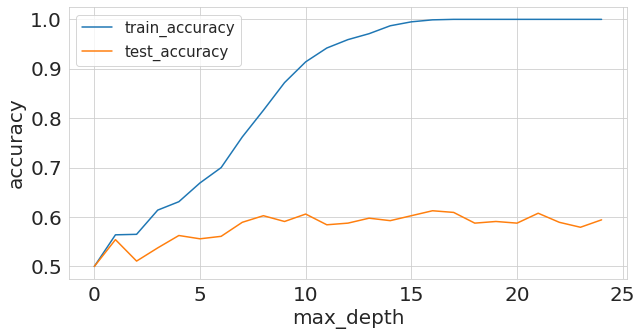

In [40]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

plt.plot(train_accuracies, label = 'train_accuracy')
plt.plot(test_accuracies, label = 'test_accuracy')
plt.legend(loc='upper left', prop={'size' : 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

--------

Text(0, 0.5, 'count')

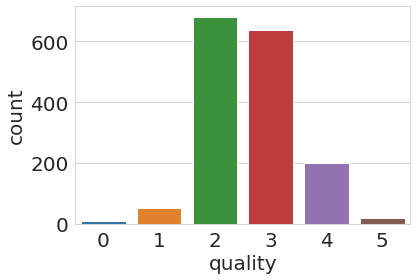

In [41]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

```python

# kfold

import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
    # 학습 데이터
    df = pd.read_csv("main.csv")

    # kfold 라는 새로운 열 생성, -1 부여
    df["kfold"] = -1

    # 행을 랜덤하게 섞기
    df = df.sample(frac=1).reset_index(drop=True)

    # model_selection 모듈의 kfold 클래스를 초기화한다.
    k_fold = model_selection.KFold(n_splits=5)

    # kfold 열을 폴드 아이디로 지정
    for fold, (trn_, val_) in enumerate(k_fold.split(X=df)):
        df.loc[val_, "kfold"] = fold

    df.to_csv("train_folds.csv", index=False)

    
# StratifiedKFold

import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
    # 학습 데이터
    df = pd.read_csv("main.csv")

    # kfold 라는 새로운 열 생성, -1 부여
    df["kfold"] = -1

    # 행을 랜덤하게 섞기
    df = df.sample(frac=1).reset_index(drop=True)

    # 타겟 변수를 가져온다.
    y = df.target.values

    # model_selection 모듈의 kfold 클래스를 초기화한다.
    st_k_fold = model_selection.StratifiedKFold(n_splits=5)

    # kfold 열을 폴드 아이디로 지정
    for fold, (t_, v_) in enumerate(st_k_fold.split(X=df, y=y)):
        df.loc[v_, "kfold"] = fold

    df.to_csv("train_folds.csv", index=False)    
```

In [42]:
# import numpy as np
# from sklearn.model_selection import StratifiedKFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([0, 0, 1, 1])
# skf = StratifiedKFold(n_splits=2)
# skf.get_n_splits(X, y)

# print(skf)

# for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


In [48]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    data['kfold'] = -1

    data = data.sample(frac=1).reset_index(drop=True)

    # Sturge 룰로 타겟 변수를 나눌 그룹의 개수를 계산
    num_bins = np.floor(1 + np.log2(len(data))).astype(np.int32)

    data.loc[:, "bins"] = pd.cut(
        data['target'], bins=num_bins, labels=False
    )

    kf = model_selection.StratifiedKFold(n_splits=5)

    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
        
    data = data.drop("bins", axis =1)
    
    return data


if __name__ == "__main__":
    X, y = datasets.make_regression(
        n_samples=15000, n_features=100, n_targets=1
    )

    df = pd.DataFrame(
        X, columns=[f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:, "target"] = y
    df = create_folds(df)

In [49]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,0.919207,-0.895058,-0.960076,-1.031332,-0.143934,0.921878,-0.716665,1.001273,0.267660,1.087939,...,-0.184487,-0.462718,0.032545,-0.178680,1.317051,1.428054,-0.161891,0.997867,-45.069753,0
1,-1.643010,0.058437,-0.253784,-0.526681,2.080255,0.795635,-0.172836,0.951041,-0.553574,-0.916467,...,-2.331428,-0.971314,0.145461,-1.642159,-0.479184,-0.151532,-0.003910,0.080264,345.286704,0
2,0.644830,0.053667,-2.068306,0.120607,1.442168,0.649427,-1.189425,0.532998,1.248507,-1.304522,...,0.070460,1.806360,0.905359,1.511450,0.252290,-2.263754,1.849331,0.795129,345.674108,0
3,-2.309799,-0.799365,0.376363,0.996238,0.105676,-0.779155,-0.498010,-0.368906,1.375281,-1.051634,...,-1.080115,-0.884546,0.091800,0.672706,-0.859178,-0.964398,-0.303048,-1.780057,-17.054062,0
4,-0.898262,-1.793958,0.475364,0.036559,0.508603,-0.202369,-0.179647,-0.036257,-0.069851,-0.099008,...,-1.404918,0.631468,-0.922160,-0.242117,1.116076,-0.217042,-0.625022,-0.973277,182.840230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.931296,-0.859423,-0.365813,1.395849,-0.545475,2.668885,-0.718097,1.418733,0.069252,-1.659399,...,0.704405,1.814337,0.863301,0.230031,-0.574456,-0.697675,0.361534,-0.119421,-101.470981,4
14996,-0.056996,-0.751232,0.076458,0.591801,0.341526,-0.261347,-0.981681,-0.253876,-1.066831,-0.213677,...,0.534657,-0.476235,1.148245,1.090212,1.022660,0.470118,-0.219021,-0.829577,131.736996,4
14997,-0.277051,-0.566653,-0.107784,0.373267,-0.865445,0.152157,0.157517,0.459802,-0.232863,2.298864,...,-0.274176,0.395801,0.307525,-0.606938,-0.012006,-0.806827,-0.416635,-0.934287,184.278016,4
14998,0.504095,-0.137057,-0.219296,0.097407,-0.651146,0.710132,0.279662,-1.540861,-1.349527,0.354398,...,0.547629,-1.455151,0.773375,-0.775125,0.312617,2.492352,1.991393,-0.870804,-60.322659,4
